<p>
    An airline is a company that provides air transport services for traveling passengers and freight. Airlines use aircraft to supply these services and may form partnerships or alliances with other airlines for codeshare agreements, in which they both offer and operate the same flight. Generally, airline companies are recognized with an air operating certificate or license issued by a governmental aviation body. Airlines may be scheduled or charter operators.</p>
    
<p>
    Airlines assign prices to their services in an attempt to maximize profitability. The pricing of airline tickets has become increasingly complicated over the years and is now largely determined by computerized yield management systems.</p>
    
<p>
    The price of an Airline Ticket is affected by a number of factors, such as flight duration, days left for departure, arrival time and departure time etc. Airline organizations may diminish the cost at the time they need to build the market and at the time when the tickets are less accessible. They may maximize the costs. The price may rely upon different factors. Each factor has its own proprietary rules and algorithms to set the price accordingly. Recent advances in Artificial Intelligence (AI) and Machine Learning (ML) makes it possible to infer such rules and model the price variation.
</p>

In [1]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
import requests
from io import StringIO
import pandas as pd
url = "https://raw.githubusercontent.com/sakethlingerker/Flight_Price_Prediction/refs/heads/main/Clean_Dataset.csv"
response = requests.get(url)

if response.status_code == 200:
    data = StringIO(response.text)
    df = pd.read_csv(data)
    print("Number of data points =", len(df))
    print(df.head())
else:
    print("Failed to retrieve the data, status code:", response.status_code)

Number of data points = 300153
   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  


In [3]:
# Droping the useless column 'Unnamed: 0'
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
# A Quick Information abou the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [4]:
# Stastical Description of Data
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [5]:
# Size of the data
df.shape

(300153, 11)

In [6]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [7]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

,count
airline,
Indigo,704
Air_India,218
GO_FIRST,205
SpiceJet,186
Vistara,133
AirAsia,115


<ipython-input-8-a920723e2b2c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df1['airline'],palette='hls')


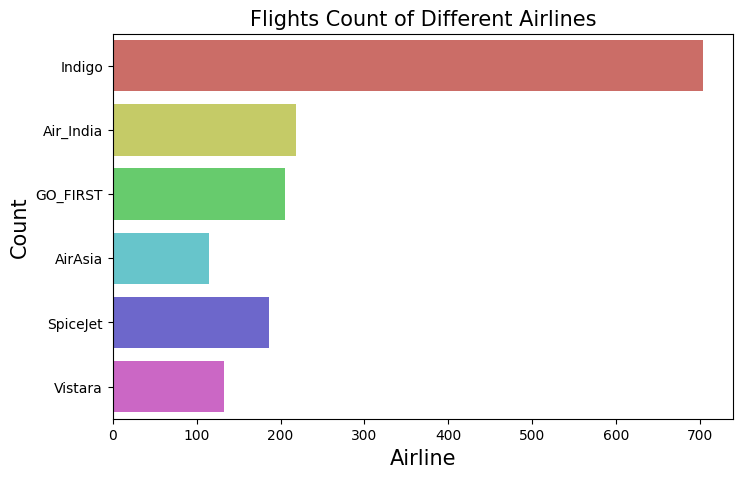

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(df1['airline'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

<b> Indigo becaming as a most popular Airline

In [9]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

,count
class,
Economy,1560
Business,295


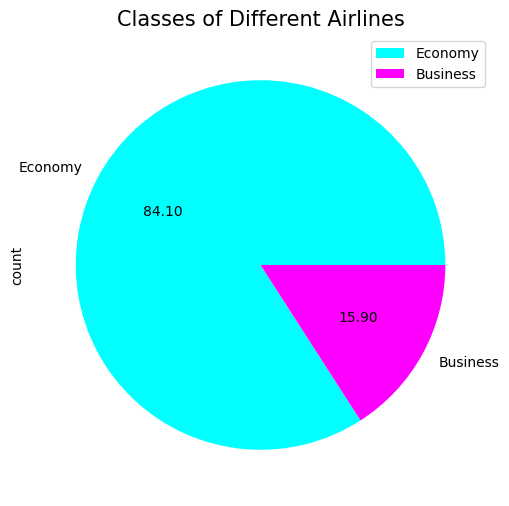

In [10]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

<b> Most of the Airlines has Economic Class as common

<b> Does price vary with Airlines?</b>

<p>
    
<ul>
    <li>As we can see Vistara has Maximum Price range</li>
    <li>Vistara and Air_India Airlines Have Maximum Price when compared to Others</li>
    <li>SpiceJet , AirAsia , GO_First and Indigo has some what equal prices</li>  
    
</ul>
</p>

<ipython-input-11-7f35d7663c03>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['airline'],y=df['price'],palette='hls')


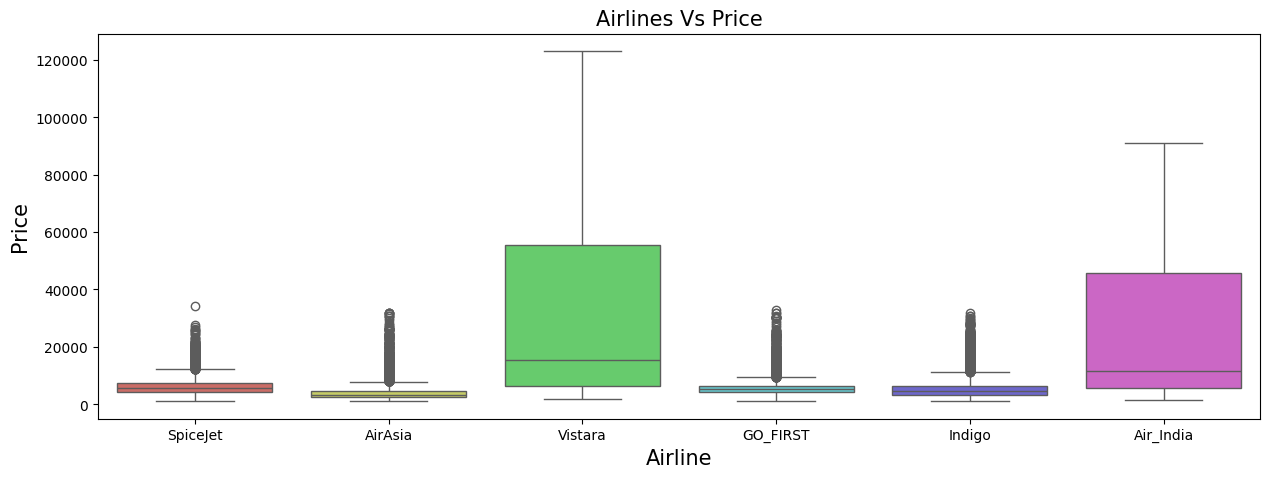

In [11]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<ipython-input-12-c6d4e46426f7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class',y='price',data=df,palette='hls')


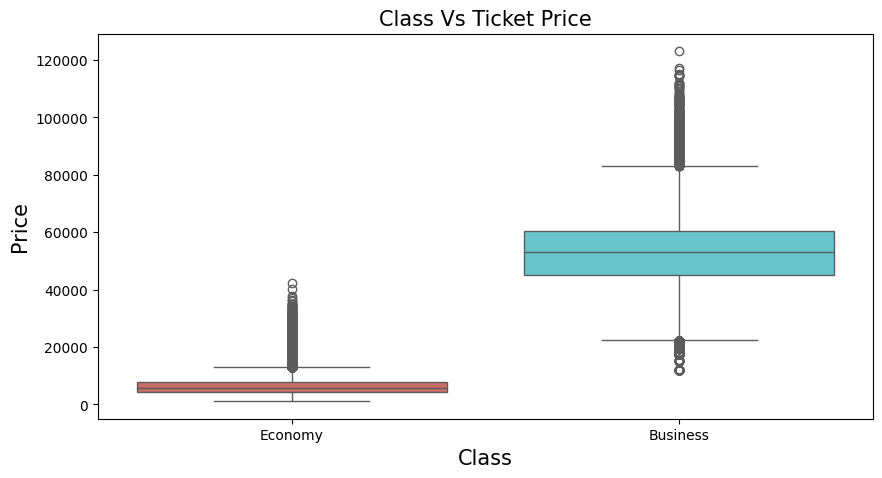

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<p>
    <b> How Does the Ticket Price vary between Economy and Business Class?</b>
   
<ul>
    <li>Ticket Price is Maximum for Bussiness Class When compared to Economy Class</li>
</ul>
    </p>

<ipython-input-14-9a380a705a0c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stops',y='price',data=df,palette='hls')


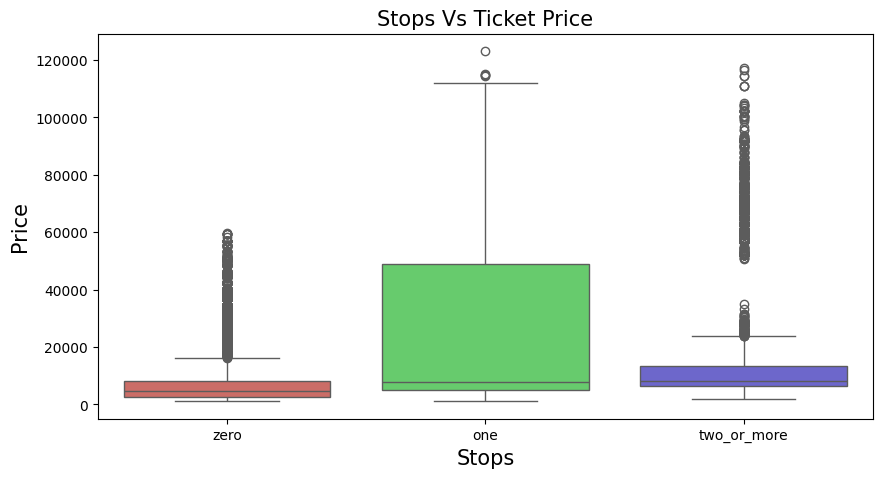

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<b> How Does the Ticket Price vary with the number of stops of a Flight?</b>

<p>
<ul><li>Flights having one stop has maximum ticket price</li></ul>
</p>

<ipython-input-15-ad35089ce3d6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')


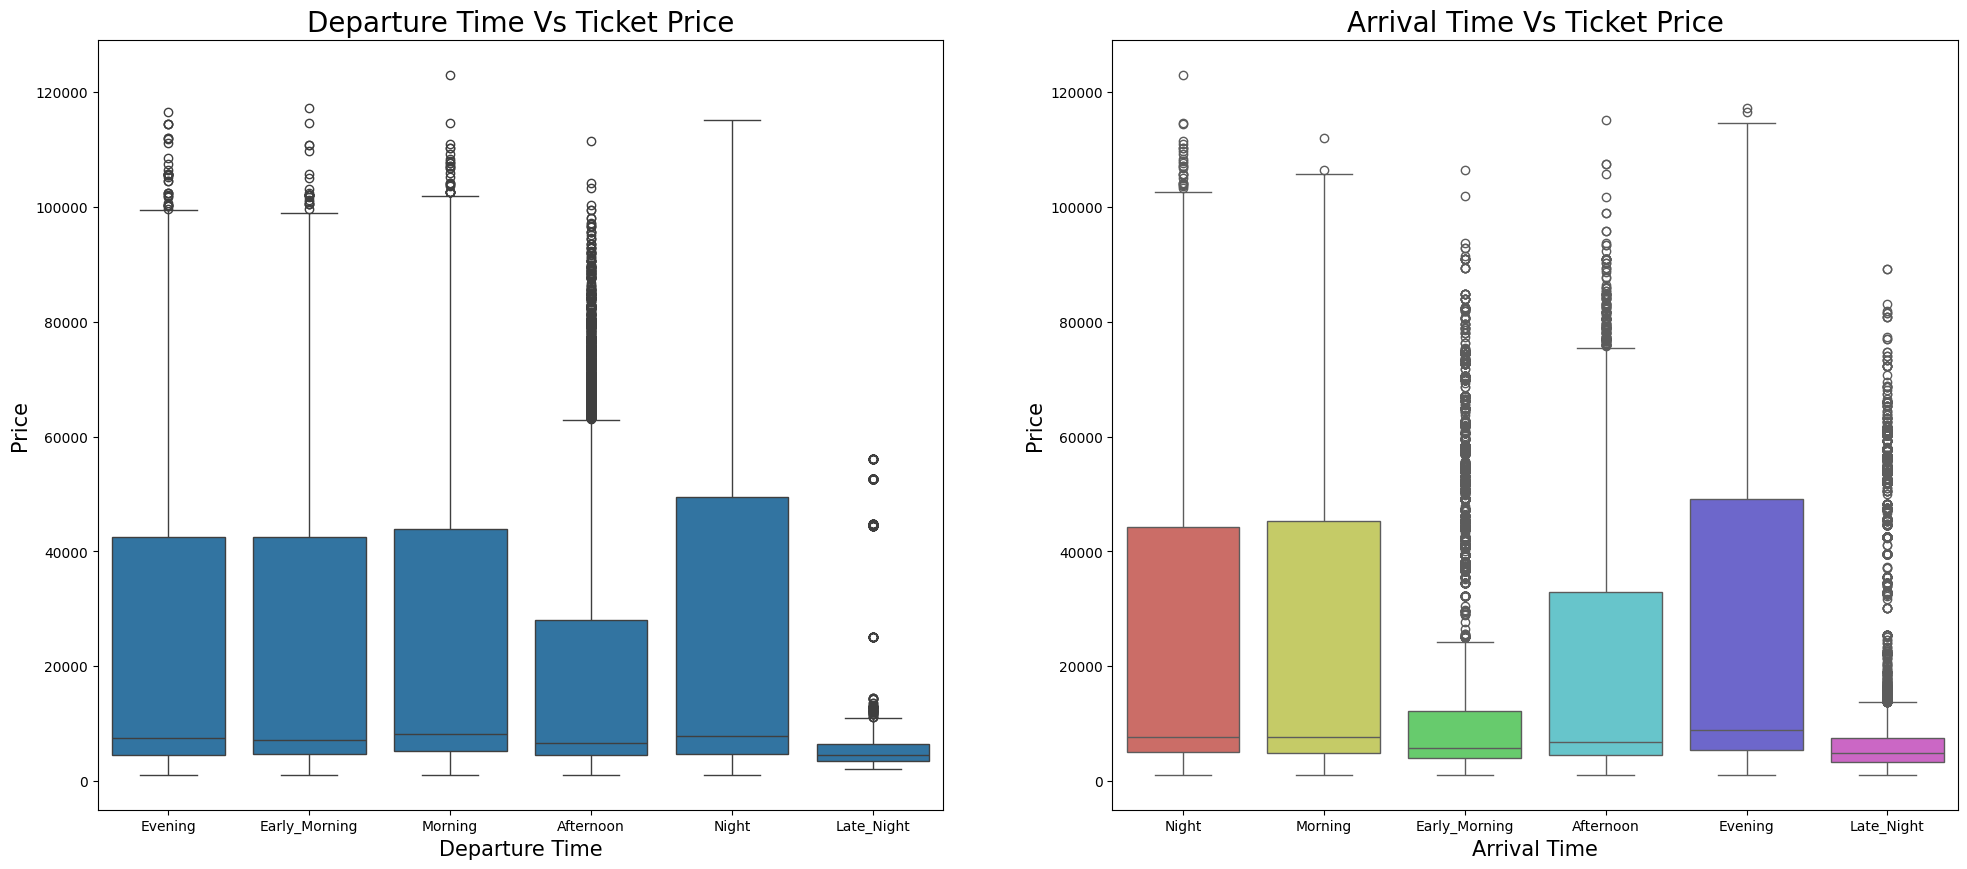

In [15]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<p>
    

    
<b>1. Departure Time Vs Ticket Price</b>

   <ul>
   <li> Ticket Price is More for the Flights when the Departure Time is at Night</li>
   <li>Ticket Price is almost equal for flights Having Departure time at Early_morning , Morning and Evening</li>
   <li>Ticket Price is Low for the Flights Having Departure Time at Late_night</li>
   </ul>
    


<b>2. Arrival Time Vs Ticket Price</b>

   <ul>
    <li>Ticket Price is More for the Flights when the Arrival Time is at Evening</li>
    <li>Ticket Price is almost equal for flights Having Arrival time is at Morning and Night</li>
   <li>Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time</li>
    </ul>
 </p>

<p>
<b> How the price changes with change in Source city and Destination city?</b><br>
    

</p>

<ipython-input-16-50ee13ac79b7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='destination_city',y='price',data=df,palette='hls')


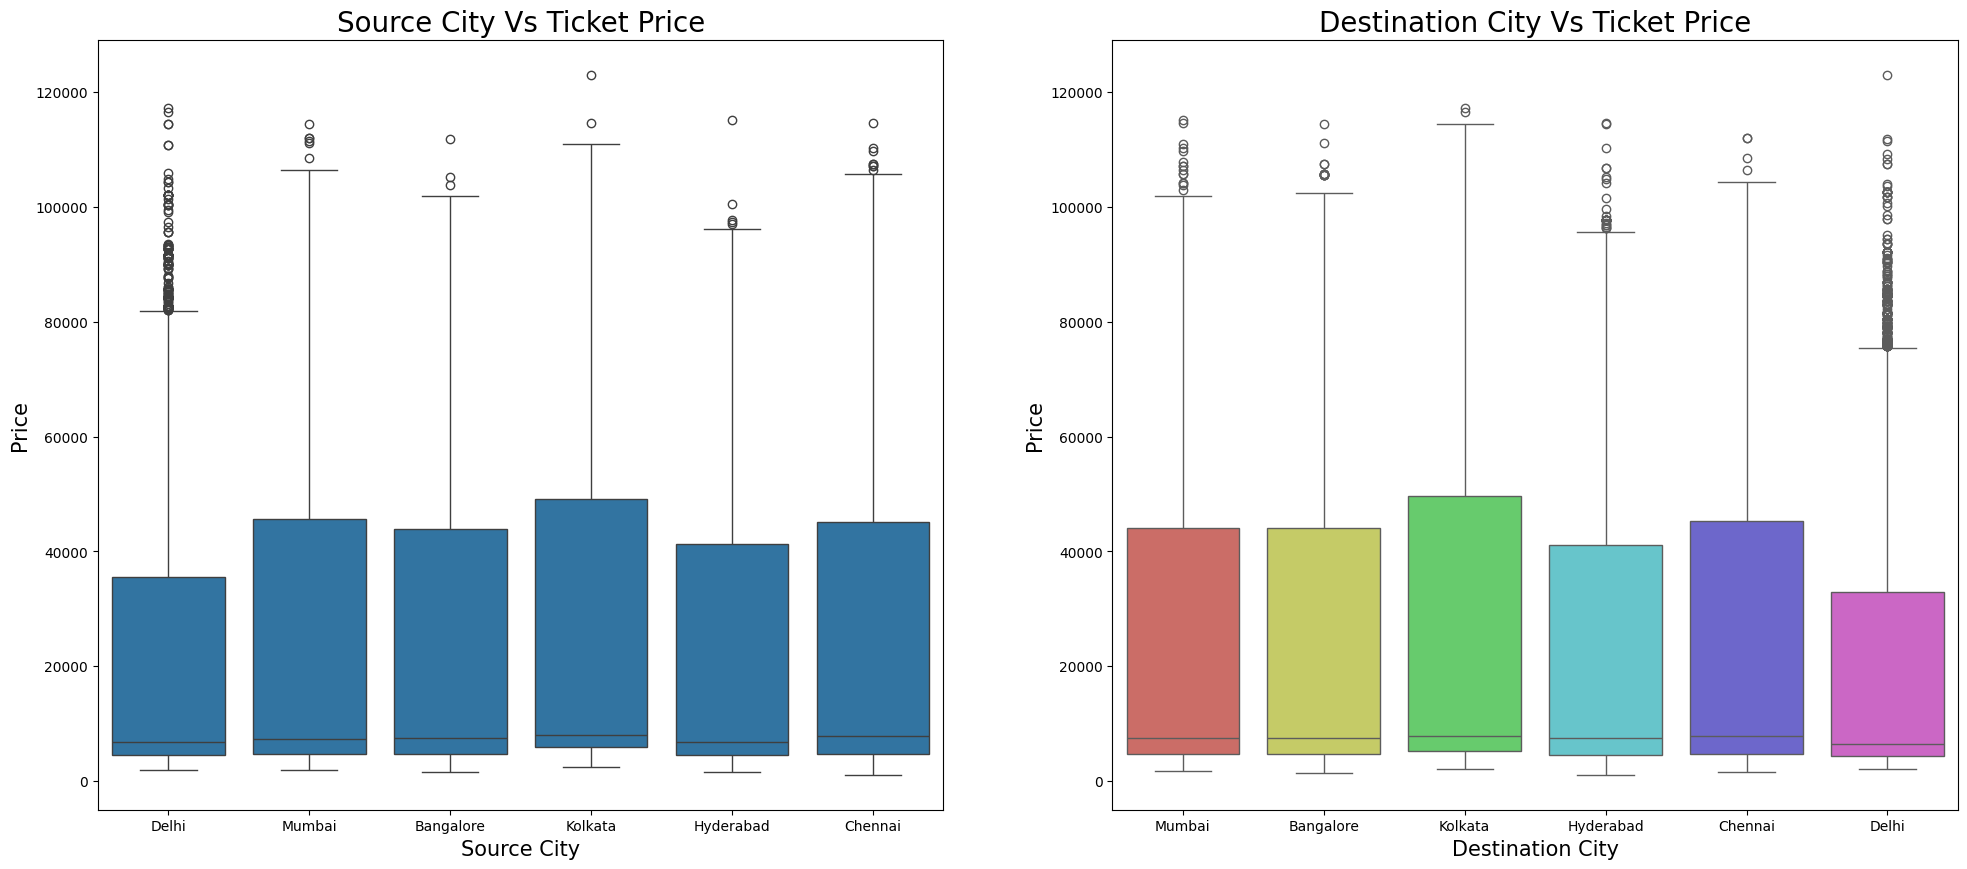

In [16]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<b>1. Source City Vs Ticket Price</b>

   <li> Ticket Price is More for the Flights whose Source City is Kolkata</li>
   <li>Ticket Price is almost equal for flights Having Source Cities as Mumbai and chennai , Hyderabad and Bangalore</li>
    <li> Ticket Price is Low for the Flights Having Source City as Delhi</li>
    

<b>2. Destination City Vs Ticket Price</b>

   <li> Ticket Price is More for the Flights whose Destination City is kolkata and Chennai</li>
   <li> Ticket Price is almost equal for flights Having Destination Cities as Mumbai and Bangalore</li>
   <li>Ticket Price is Low for the Flights Having Destination City as Delhi</li>

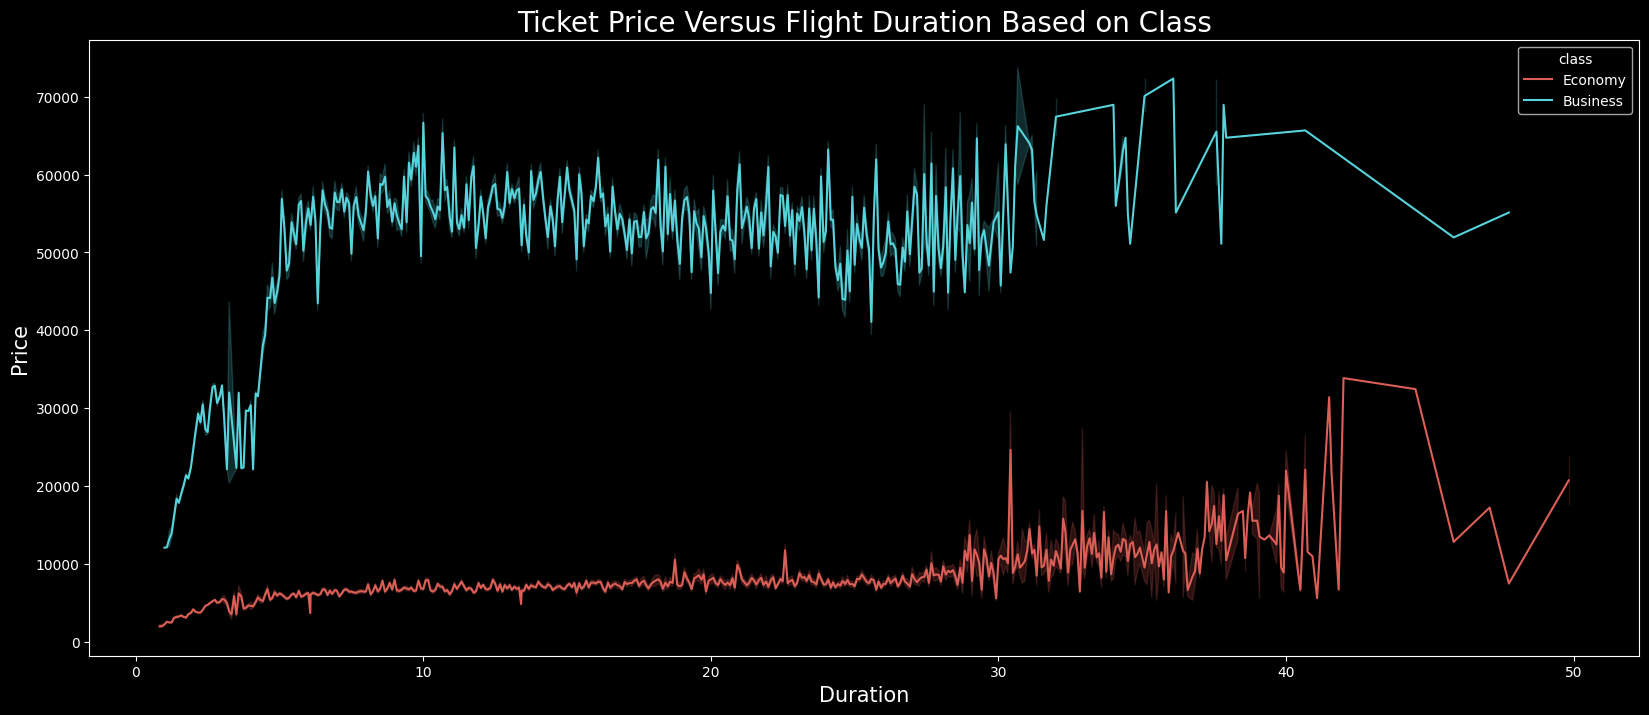

In [17]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<p>
    <b> How Price Varies with the Flight Duration Based on Class?</b>

<li> With increase in Duration, the Ticket Price is also Increases In both the Economy and Business classes</li>
</p>


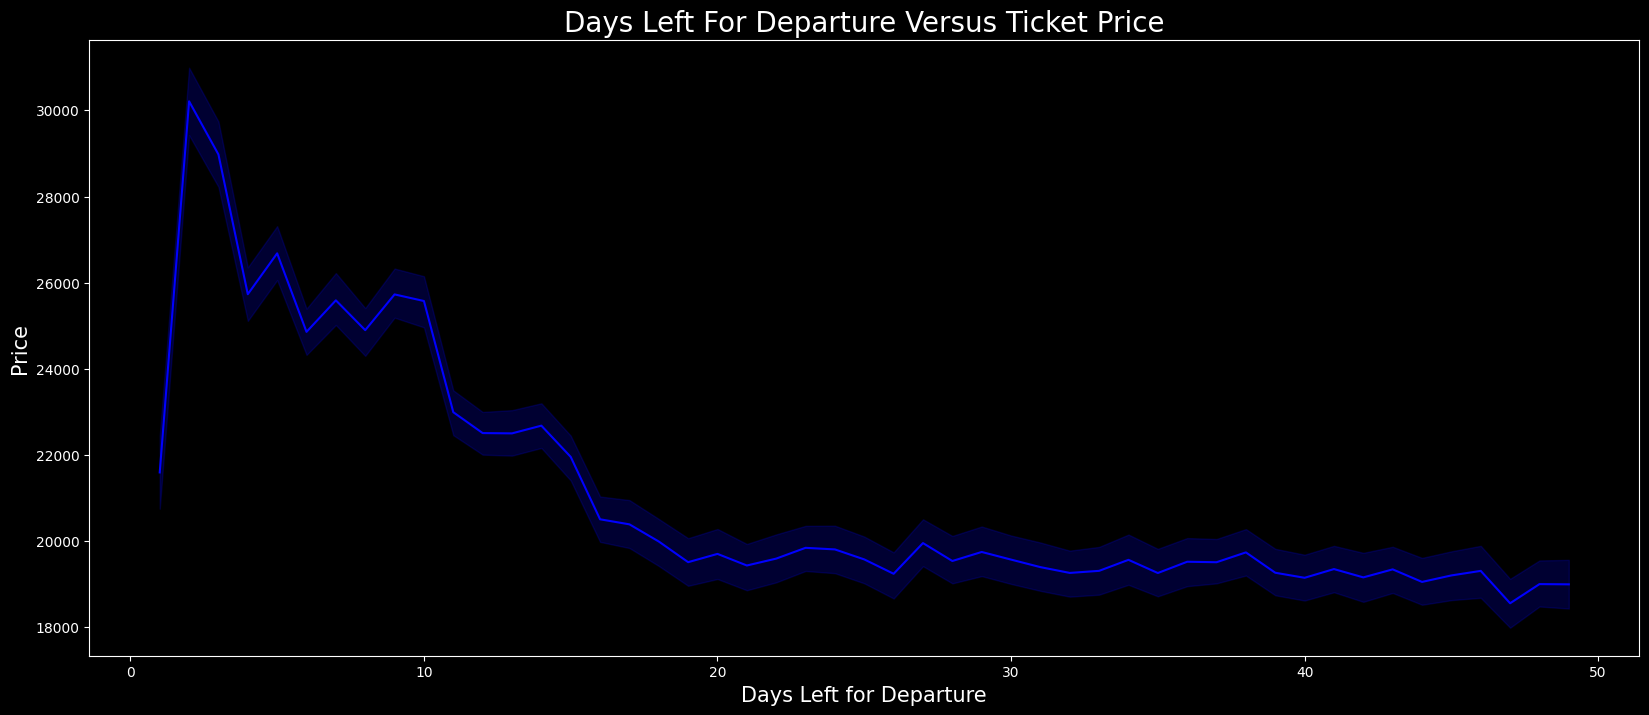

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<p>
    <b> How does the price affected on the days left for Departure?</b>
    
<li> As we can see when compared to others when there are two days remaining for departure then the Ticket Price is very High for all airlines</li>
    
</p>

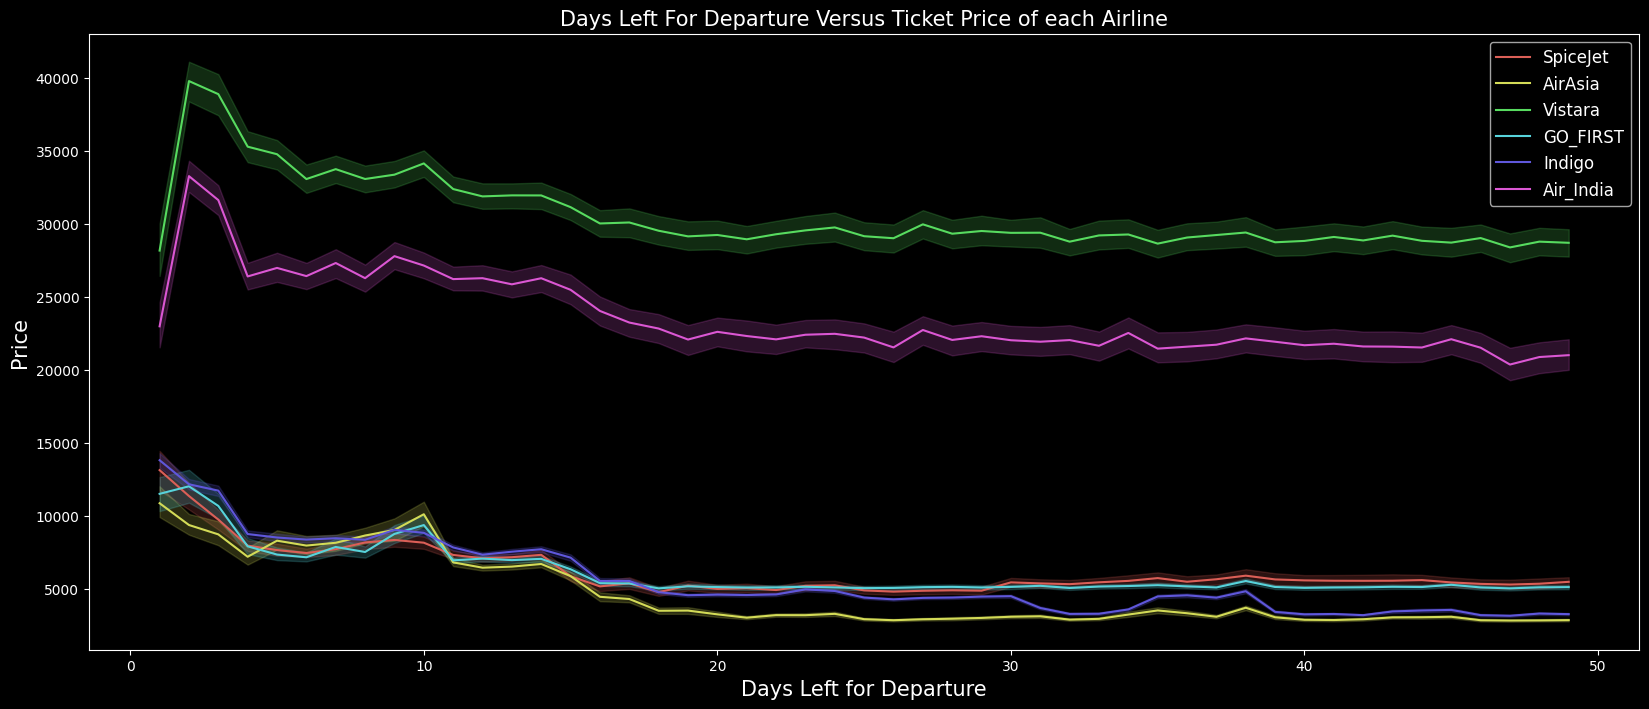

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<b> Total number of Flights from one city to another</b>

In [18]:
df.flight

,flight
0,SG-8709
1,SG-8157
2,I5-764
3,UK-995
4,UK-963
...,...
300148,UK-822
300149,UK-826
300150,UK-832
300151,UK-828


In [19]:
df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


<b> Average Price of different Airlnes from Source city to Destination city</b>

In [21]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


In [22]:
# Creating a Back up File
df_bk=df.copy()

In [23]:
df_bk.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [24]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [26]:
df.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
5,5,1541,2,4,2,0,5,1,2.33,1,5955
6,5,1533,2,4,2,4,5,1,2.08,1,6060
7,5,1543,2,0,2,2,5,1,2.17,1,6060
8,2,1013,2,1,2,4,5,1,2.17,1,5954
9,2,1014,2,0,2,2,5,1,2.25,1,5954


In [27]:
# storing the Dependent Variables in X and Independent Variable in Y
x=df.drop(['price','flight'],axis=1)
y=df['price']

In [39]:
x.shape,y.shape

((300153, 9), (300153,))

In [28]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 9), (90046, 9), (210107,), (90046,))

In [29]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [30]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()


,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [31]:

# Create all the regressor models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor

# Create model objects with default parameters
modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE = Ridge()
modelLO = Lasso(alpha=0.1)

# Initialize GradientBoostingRegressor with correct 'loss' parameter
modelGBR = GradientBoostingRegressor(
    loss='squared_error',  # Corrected loss parameter
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    alpha=0.9,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0
)

# List of models to evaluate
MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag, modelRE, modelLO]

# DataFrame for storing results
Results = pd.DataFrame(columns=[
    'Model Name',
    'Mean_Absolute_Error_MAE',
    'Adj_R_Square',
    'Root_Mean_Squared_Error_RMSE',
    'Mean_Absolute_Percentage_Error_MAPE',
    'Mean_Squared_Error_MSE',
    'Root_Mean_Squared_Log_Error_RMSLE',
    'R2_score'
])

# Iterate over models, train, and evaluate
for models in MM:
    # Fit the model
    models.fit(x_train, y_train)

    # Predict the model with test data
    y_pred = models.predict(x_test)

    # Print model name and evaluation metrics
    print('Model Name: ', models)

    from sklearn import metrics
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred), 3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred), 3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred), 6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), 3))

    # Calculate MAPE
    def MAPE(y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    print("-----------------------------------------------------------------------------------------------------------------------")
    # Add model performance to the results DataFrame
    new_row = pd.DataFrame([{
        'Model Name': models.__class__.__name__,
        'Mean_Absolute_Error_MAE': metrics.mean_absolute_error(y_test, y_pred),
        'Adj_R_Square' : adjusted_r_squared,
        'Root_Mean_Squared_Error_RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        'Mean_Absolute_Percentage_Error_MAPE': result,
        'Mean_Squared_Error_MSE': metrics.mean_squared_error(y_test, y_pred),
        'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
        'R2_score': metrics.r2_score(y_test, y_pred)
    }])

    Results = pd.concat([Results, new_row], ignore_index=True)




Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4633.176
Mean Squared Error (MSE): 49079940.275
Root Mean Squared Error (RMSE): 7005.708
R2_score: 0.904637
Root Mean Squared Log Error (RMSLE): 8.854
Adj R Square:  0.904627
------------------------------------------------------------------------------------------------------------
Mean Absolute Percentage Error (MAPE): 43.98 %
-----------------------------------------------------------------------------------------------------------------------


<ipython-input-31-6faa61872d28>:104: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Results = pd.concat([Results, new_row], ignore_index=True)


Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 2293.298
Mean Squared Error (MSE): 27728092.18
Root Mean Squared Error (RMSE): 5265.747
R2_score: 0.946124
Root Mean Squared Log Error (RMSLE): 8.569
Adj R Square:  0.946119
------------------------------------------------------------------------------------------------------------
Mean Absolute Percentage Error (MAPE): 13.63 %
-----------------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 2038.62
Mean Squared Error (MSE): 18240910.713
Root Mean Squared Error (RMSE): 4270.938
R2_score: 0.964558
Root Mean Squared Log Error (RMSLE): 8.36
Adj R Square:  0.964554
------------------------------------------------------------------------------------------------------------
Mean Absolute Percentage Error (MAPE): 12.26 %
---------------------------------------------------------------------------------------------

In [32]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression,4633.175509,0.904627,7005.707693,43.982424,4.907994e+07,8.854480,0.904637
1,DecisionTreeRegressor,2293.297985,0.946119,5265.747068,13.626722,2.772809e+07,8.568978,0.946124
2,RandomForestRegressor,2038.619526,0.964554,4270.937920,12.263003,1.824091e+07,8.359589,0.964558
3,KNeighborsRegressor,1961.042314,0.969302,3974.605879,11.887342,1.579749e+07,8.287681,0.969305
4,ExtraTreesRegressor,1839.129751,0.969597,3955.486784,11.247268,1.564588e+07,8.282859,0.969600
5,GradientBoostingRegressor,2989.743152,0.951450,4998.444181,21.536812,2.498444e+07,8.516882,0.951455
6,XGBRegressor,2477.504518,0.963229,4350.009653,16.786234,1.892258e+07,8.377933,0.963233
7,BaggingRegressor,2121.217555,0.961129,4472.551160,12.663099,2.000371e+07,8.405714,0.961133
8,Ridge,4633.196900,0.904627,7005.704302,43.982746,4.907989e+07,8.854480,0.904637
9,Lasso,4633.058301,0.904628,7005.698274,43.979298,4.907981e+07,8.854479,0.904638


In [33]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor','Ridge Regression','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,ExtraTreesRegressor,0.969597,1839.129751,3955.486784,11.247268,1.564588e+07,8.282859,0.969600
1,KNeighborsRegressor,0.969302,1961.042314,3974.605879,11.887342,1.579749e+07,8.287681,0.969305
2,RandomForestRegressor,0.964554,2038.619526,4270.937920,12.263003,1.824091e+07,8.359589,0.964558
3,XGBRegressor,0.963229,2477.504518,4350.009653,16.786234,1.892258e+07,8.377933,0.963233
4,BaggingRegressor,0.961129,2121.217555,4472.551160,12.663099,2.000371e+07,8.405714,0.961133
5,GradientBoostingRegressor,0.951450,2989.743152,4998.444181,21.536812,2.498444e+07,8.516882,0.951455
6,DecisionTreeRegressor,0.946119,2293.297985,5265.747068,13.626722,2.772809e+07,8.568978,0.946124
7,Lasso Regression,0.904628,4633.058301,7005.698274,43.979298,4.907981e+07,8.854479,0.904638
8,LinearRegression,0.904627,4633.175509,7005.707693,43.982424,4.907994e+07,8.854480,0.904637
9,Ridge Regression,0.904627,4633.196900,7005.704302,43.982746,4.907989e+07,8.854480,0.904637


In [34]:
result.to_csv("performance.csv",index=False)

<p> From the Above Results, The Top 3 Models by comparing Errors , Adj_R_Square and R2_Score values are<br>
    
1. <b>ExtraTreesRegressor</b>
2. <b>RandomForestRegressor</b>
3. <b>Bagging Regressor</b><br>

<p>Training the Data with <b>ExtraTreesRegressor</b></p>
</p>

In [35]:
#Trainig the model with
modelETR.fit(x_train, y_train)

# Predict the model with test data

y_pred = modelETR.predict(x_test)

In [36]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [37]:
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
8020,Vistara,UK-837,Delhi,Evening,one,Morning,Mumbai,Economy,18.25,40,5040,5040,5355.59
23134,Air_India,AI-401,Delhi,Early_Morning,zero,Morning,Kolkata,Economy,2.17,19,3428,3428,3169.99
171014,Indigo,6E-531,Hyderabad,Early_Morning,one,Afternoon,Kolkata,Economy,9.00,5,8490,8490,8138.32
251589,Vistara,UK-810,Bangalore,Early_Morning,one,Evening,Mumbai,Business,12.08,35,62524,62524,63150.08
87072,Air_India,AI-9517,Bangalore,Evening,one,Afternoon,Delhi,Economy,19.00,17,4105,4105,4258.59
136022,Air_India,AI-402,Kolkata,Morning,one,Night,Bangalore,Economy,9.67,5,15204,15204,14284.86
105398,Indigo,6E-6067,Bangalore,Evening,one,Night,Kolkata,Economy,6.33,21,3489,3489,4899.95
19697,AirAsia,I5-783,Delhi,Early_Morning,two_or_more,Afternoon,Bangalore,Economy,6.83,47,7423,7423,5869.07
181942,SpiceJet,SG-612,Chennai,Night,one,Morning,Delhi,Economy,11.75,14,7352,7352,7389.87
296061,Air_India,AI-430,Chennai,Morning,one,Morning,Kolkata,Business,23.08,5,55377,55377,49739.41


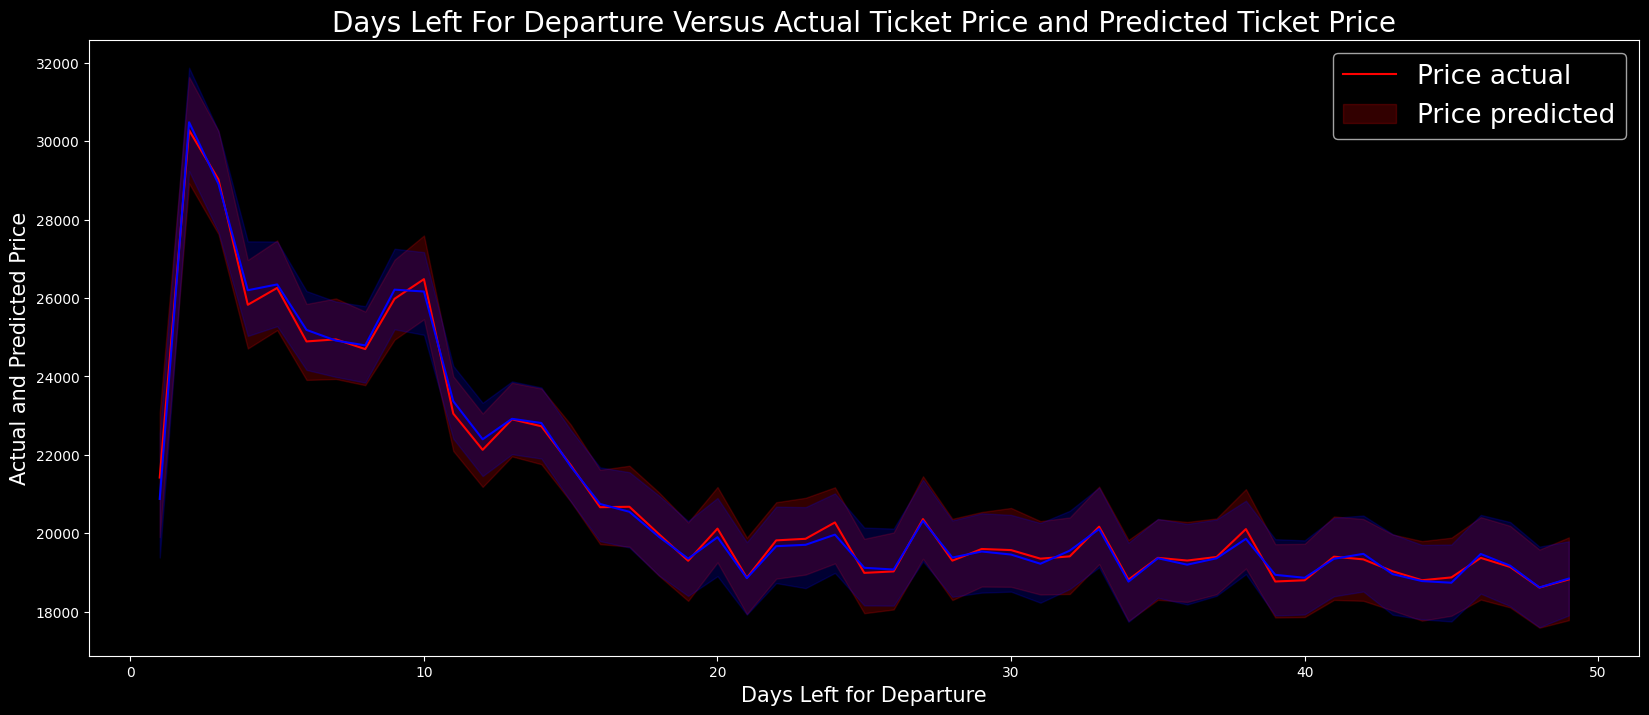

In [40]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

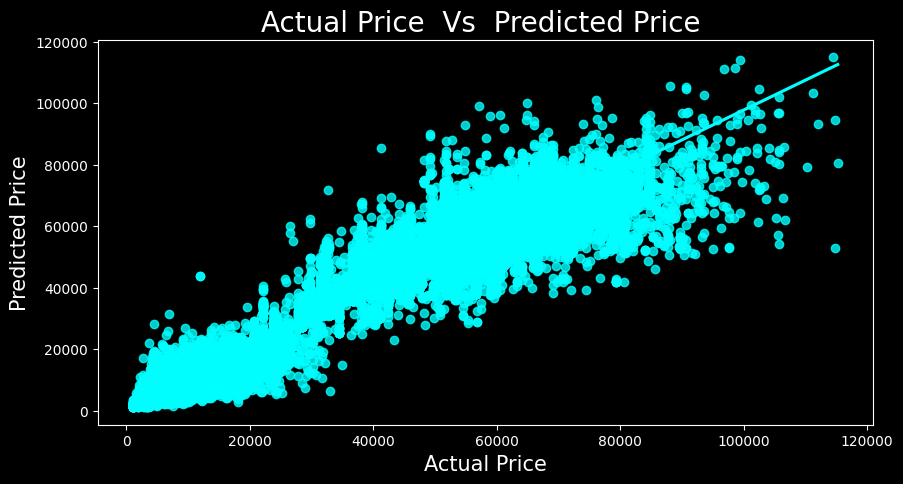

In [41]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

In [42]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [45]:
attributes = [
    'airline', 'flight', 'source_city', 'departure_time',
    'stops', 'arrival_time', 'destination_city', 'class',
    'duration', 'days_left'
]

# Display unique values for each attribute
for attribute in attributes:
    print(f"List of unique values for {attribute}:")
    print(df[attribute].unique())
    print("-" * 50)

List of unique values for airline:
[4 0 5 2 3 1]
--------------------------------------------------
List of unique values for flight:
[1408 1387 1213 ...  558  587  718]
--------------------------------------------------
List of unique values for source_city:
[2 5 0 4 3 1]
--------------------------------------------------
List of unique values for departure_time:
[2 1 4 0 5 3]
--------------------------------------------------
List of unique values for stops:
[2 0 1]
--------------------------------------------------
List of unique values for arrival_time:
[5 4 1 0 2 3]
--------------------------------------------------
List of unique values for destination_city:
[5 0 4 3 1 2]
--------------------------------------------------
List of unique values for class:
[1 0]
--------------------------------------------------
List of unique values for duration:
[ 2.17  2.33  2.25  2.08 12.25 16.33 11.75 14.5  15.67  3.75  2.5   5.83
  8.    6.   14.67 16.17 18.   23.17 24.17  8.83  4.5  15.25 11

In [46]:
df.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
122924,4,1321,4,4,0,2,2,1,7.50,22,10028
243378,1,810,5,2,0,0,1,0,18.67,28,49613
153177,1,828,3,5,0,4,2,1,10.92,8,12538
52172,5,1502,5,0,0,5,2,1,7.75,46,6221
55745,1,825,5,0,0,3,0,1,8.17,18,6502
50117,2,1005,5,0,2,0,2,1,2.25,37,2339
251113,5,1471,0,4,0,5,5,0,11.33,30,54684
177394,3,295,3,1,2,1,1,1,1.17,16,1788
50555,0,1198,5,4,0,0,2,1,5.75,39,2336
290923,5,1486,1,1,0,0,5,0,7.08,11,56273


In [ ]:
airline = int(input("Enter Airline (0: Indigo, 1: Air India, 2: GO FIRST, 3: SpiceJet, 4: Vistara, 5: AirAsia): "))
flight = int(input("Enter Flight Number: "))
source_city = int(input("Enter Source City (0: Bangalore, 1: Chennai, 2: Delhi, 3: Hyderabad, 4: Kolkata, 5: Mumbai): "))
departure_time = int(input("Enter Departure Time (0: Afternoon, 1: Early_Morning, 2: Evening, 3: Late_Night, 4: Morning, 5: Night): "))
stops = int(input("Enter Number of Stops (0, 1, or 2): "))
arrival_time = int(input("Enter Arrival Time (0: Afternoon, 1: Early_Morning, 2: Evening, 3: Late_Night, 4: Morning, 5: Night): "))
destination_city = int(input("Enter Destination City (0: Bangalore, 1: Chennai, 2: Delhi, 3: Hyderabad, 4: Kolkata, 5: Mumbai): "))
flight_class = int(input("Enter Class (0: Business, 1: Economy): "))
duration = float(input("Enter Duration (in hours): "))
days_left = int(input("Enter Days Left for Booking (0-49): "))

Enter Airline (0: Indigo, 1: Air India, 2: GO FIRST, 3: SpiceJet, 4: Vistara, 5: AirAsia): 4
Enter Flight Number: 653
Enter Source City (0: Bangalore, 1: Chennai, 2: Delhi, 3: Hyderabad, 4: Kolkata, 5: Mumbai): 5
Enter Departure Time (0: Afternoon, 1: Early_Morning, 2: Evening, 3: Late_Night, 4: Morning, 5: Night): 1
Enter Number of Stops (0, 1, or 2): 1
Enter Arrival Time (0: Afternoon, 1: Early_Morning, 2: Evening, 3: Late_Night, 4: Morning, 5: Night): 2
Enter Destination City (0: Bangalore, 1: Chennai, 2: Delhi, 3: Hyderabad, 4: Kolkata, 5: Mumbai): 2
Enter Class (0: Business, 1: Economy): 0
Enter Duration (in hours): 13
Enter Days Left for Booking (0-49): 30


In [ ]:
user_inputs=np.array([[airline,flight,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left]])
user_inputs

array([[  4., 653.,   5.,   1.,   1.,   2.,   2.,   0.,  13.,  30.]])

In [ ]:
print("Predicted Price:",modelETR.predict(user_inputs))

Predicted Price: [33124.89]


In [47]:
import pickle
from google.colab import files

with open('flight_model.pkl', 'wb') as file:
    pickle.dump(modelETR, file)

files.download('flight_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>